In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [262]:
ev_signals = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-ev-signals.csv', 
                header = 0, index_col = 0)
grid_signals = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-ev-grid-signals.csv', 
                header = 0, index_col = 0)

ev_signals = ev_signals[ev_signals.columns[24:]]
grid_signals = grid_signals[grid_signals.columns[24:]]

print(ev_signals.shape, grid_signals.shape)

(43, 34992) (43, 34992)


In [263]:
ev_signals.head()

,2017-01-01 06:00:00,2017-01-01 06:15:00,2017-01-01 06:30:00,2017-01-01 06:45:00,2017-01-01 07:00:00,2017-01-01 07:15:00,2017-01-01 07:30:00,2017-01-01 07:45:00,2017-01-01 08:00:00,2017-01-01 08:15:00,...,2017-12-31 15:30:00,2017-12-31 15:45:00,2017-12-31 16:00:00,2017-12-31 16:15:00,2017-12-31 16:30:00,2017-12-31 16:45:00,2017-12-31 17:00:00,2017-12-31 17:15:00,2017-12-31 17:30:00,2017-12-31 17:45:00
26.0,0.005,0.005,0.005,0.005000,0.005,0.0050,0.005000,0.005,0.005000,0.005000,...,0.0050,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005,0.005000,0.005
114.0,0.000,0.000,0.000,0.000000,0.000,0.0000,0.000000,0.000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000
370.0,0.000,0.000,0.000,0.000000,0.000,0.0000,0.000000,0.000,0.000000,0.000000,...,0.0028,0.001400,0.000867,0.000667,0.001267,0.000000,0.000000,0.000,0.000000,0.000
379.0,0.004,0.004,0.004,0.003933,0.004,0.0038,0.003067,0.003,0.003067,0.003867,...,0.0034,0.003267,0.004000,0.004000,0.003933,0.004000,0.003733,0.004,0.004000,0.004
1169.0,0.000,0.000,0.000,0.000000,0.000,0.0000,0.000000,0.000,0.000000,0.000000,...,0.0026,0.000000,0.000000,0.003200,0.004000,0.023733,0.001333,0.000,0.006467,0.000


In [265]:
more_signals = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-random-houses-1hr.csv', 
                header = 0, index_col = 0)
more_signals.index = pd.to_datetime(more_signals.index)
more_signals.head()

,dataid,grid
localminute,,
2017-01-01 06:00:00,26,1.788783
2017-01-01 06:00:00,9983,1.946800
2017-01-01 06:00:00,59,0.805333
2017-01-01 06:00:00,9971,0.348083
2017-01-01 06:00:00,93,0.916167


In [275]:
more_houses = pd.DataFrame(columns=ev_signals.columns)
timeline = np.unique(more_signals.index)

for house in np.unique(more_signals['dataid']):
    house_data = more_signals['grid'].iloc[np.where(more_signals['dataid'] == house)]
    if len(house_data.index) == len(timeline):
        house_data = house_data.resample('15min').bfill()
        house_data = house_data.loc[pd.to_datetime(ev_signals.columns[0]):ev_signals.columns[-1]]
        more_houses.loc[house] = house_data.values

print("{} houses at 1 hour resolution".format(len(more_houses.index)))
more_houses.head()

207 houses at 1 hour resolution


,2017-01-01 06:00:00,2017-01-01 06:15:00,2017-01-01 06:30:00,2017-01-01 06:45:00,2017-01-01 07:00:00,2017-01-01 07:15:00,2017-01-01 07:30:00,2017-01-01 07:45:00,2017-01-01 08:00:00,2017-01-01 08:15:00,...,2017-12-31 15:30:00,2017-12-31 15:45:00,2017-12-31 16:00:00,2017-12-31 16:15:00,2017-12-31 16:30:00,2017-12-31 16:45:00,2017-12-31 17:00:00,2017-12-31 17:15:00,2017-12-31 17:30:00,2017-12-31 17:45:00
26,1.788783,1.223650,1.223650,1.223650,1.223650,0.667667,0.667667,0.667667,0.667667,0.477950,...,0.893983,0.893983,0.893983,0.991250,0.991250,0.991250,0.991250,1.003733,1.003733,1.003733
59,0.805333,0.802317,0.802317,0.802317,0.802317,0.459883,0.459883,0.459883,0.459883,0.488367,...,10.433417,10.433417,10.433417,8.253983,8.253983,8.253983,8.253983,5.914800,5.914800,5.914800
86,0.683733,0.546183,0.546183,0.546183,0.546183,0.425467,0.425467,0.425467,0.425467,0.445467,...,0.422383,0.422383,0.422383,0.339900,0.339900,0.339900,0.339900,0.409617,0.409617,0.409617
93,0.916167,0.459600,0.459600,0.459600,0.459600,0.352217,0.352217,0.352217,0.352217,0.321100,...,0.235117,0.235117,0.235117,0.040183,0.040183,0.040183,0.040183,1.294067,1.294067,1.294067
94,2.054933,1.762017,1.762017,1.762017,1.762017,1.170683,1.170683,1.170683,1.170683,0.876433,...,0.376900,0.376900,0.376900,0.431233,0.431233,0.431233,0.431233,0.439417,0.439417,0.439417


In [311]:
pv_signals = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-pv-all-houses-1hr.csv', 
                header = 0, index_col = 0)
pv_signals.index = pd.to_datetime(pv_signals.index)
pv_signals.head()

,dataid,gen
localminute,,
2017-01-01 06:00:00,26,0.006150
2017-01-01 06:00:00,9776,0.000000
2017-01-01 06:00:00,93,-0.007617
2017-01-01 06:00:00,9737,-0.009067
2017-01-01 06:00:00,171,-0.005000


In [316]:
pv_houses = pd.DataFrame(columns=ev_signals.columns)

for house in more_houses.index:
    house_data = pv_signals['gen'].iloc[np.where(pv_signals['dataid'] == house)]
    if len(house_data.index) == len(timeline):
        house_data = house_data.resample('15min').bfill()
        house_data = house_data.loc[pd.to_datetime(ev_signals.columns[0]):ev_signals.columns[-1]]
        pv_houses.loc[house] = house_data.values
    else:
        pv_houses.loc[house] = np.zeros(len(pv_houses.columns))

print("{} houses at 1 hour resolution".format(len(pv_houses.index)))
houses_with_pv = pv_houses.columns
pv_houses.head()

207 houses at 1 hour resolution


,2017-01-01 06:00:00,2017-01-01 06:15:00,2017-01-01 06:30:00,2017-01-01 06:45:00,2017-01-01 07:00:00,2017-01-01 07:15:00,2017-01-01 07:30:00,2017-01-01 07:45:00,2017-01-01 08:00:00,2017-01-01 08:15:00,...,2017-12-31 15:30:00,2017-12-31 15:45:00,2017-12-31 16:00:00,2017-12-31 16:15:00,2017-12-31 16:30:00,2017-12-31 16:45:00,2017-12-31 17:00:00,2017-12-31 17:15:00,2017-12-31 17:30:00,2017-12-31 17:45:00
26,0.006150,0.002250,0.002250,0.002250,0.002250,-0.000483,-0.000483,-0.000483,-0.000483,-0.000617,...,0.284867,0.284867,0.284867,0.290817,0.290817,0.290817,0.290817,0.29315,0.29315,0.29315
59,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
86,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
93,-0.007617,-0.008933,-0.008933,-0.008933,-0.008933,-0.008350,-0.008350,-0.008350,-0.008350,-0.008000,...,0.148450,0.148450,0.148450,0.213167,0.213167,0.213167,0.213167,0.15325,0.15325,0.15325
94,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000


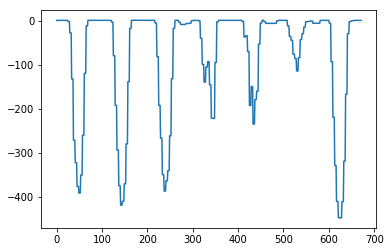

In [359]:
plt.plot(-np.sum(pv_houses)[:week].values)
plt.show()

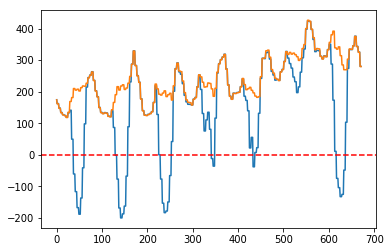

In [365]:

plt.plot(np.arange(week),aggregate[:week])
plt.plot(np.arange(week),(aggregate + np.sum(pv_houses))[:week])
plt.axhline(0,linestyle='--',color='red')

plt.show()

In [299]:
print(pv_houses.shape, more_houses.shape)

(153, 34992) (207, 34992)


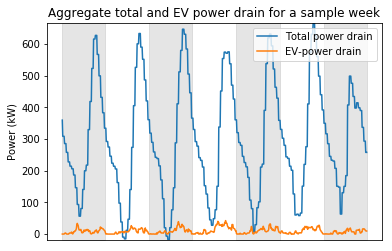

In [374]:
aggregate = np.sum(more_houses)
aggregate.index = pd.to_datetime(aggregate.index)

aggregate_pv = np.sum(pv_houses)
aggregate_pv.index = pd.to_datetime(aggregate_pv.index)

aggregate_no_pv = np.sum(more_houses) + aggregate_pv
aggregate_no_pv.index = pd.to_datetime(aggregate_no_pv.index)

aggregate_ev = np.sum(ev_signals)
aggregate_ev.index = pd.to_datetime(aggregate_ev.index)


day = 24*4
week = day*7
dice = np.random.randint(0,len(more_houses.columns)/(4*24*7))

random_week = aggregate[week*dice:week*(dice+1)]
random_week_ev = aggregate_ev[week*dice:week*(dice+1)]

plt.plot(random_week.values, label="Total power drain")
plt.plot(random_week_ev.values, label="EV-power drain")
for i in range(0,8,2):
    plt.fill_between(np.arange(day*i,day*(i+1)),np.min(random_week.values),np.max(random_week.values), color='grey', alpha=0.2)

plt.ylim(np.min(random_week),np.max(random_week))
plt.xticks([])
plt.title("Aggregate total and EV power drain for a sample week")
plt.ylabel("Power (kW)")
plt.legend()
plt.show()

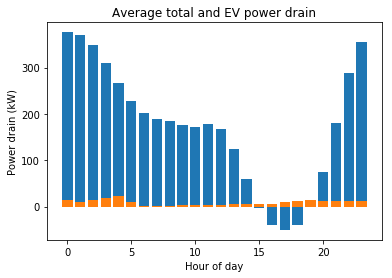

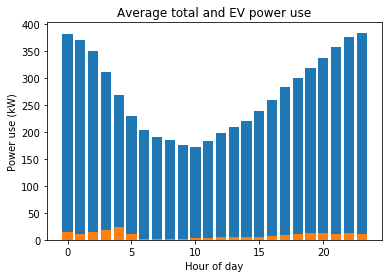

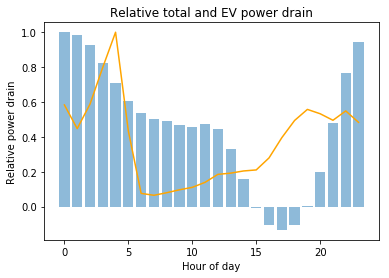

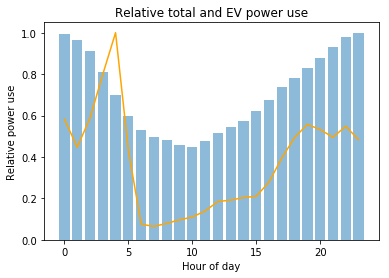

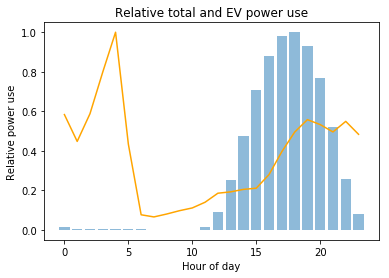

In [376]:
mean_per_hour = []
mean_per_hour_ev = []
mean_per_hour_pv = []
mean_per_hour_no_pv = []


for i in range(24):
    mean_per_hour.append(np.mean(aggregate.iloc[np.where(aggregate.index.hour == i)]))
    mean_per_hour_ev.append(np.mean(aggregate_ev.iloc[np.where(aggregate_ev.index.hour == i)]))
    mean_per_hour_no_pv.append(np.mean(aggregate_no_pv.iloc[np.where(aggregate_no_pv.index.hour == i)]))
    mean_per_hour_pv.append(np.mean(aggregate_pv.iloc[np.where(aggregate_pv.index.hour == i)]))
    
plt.bar(np.arange(24),mean_per_hour)
plt.bar(np.arange(24),mean_per_hour_ev)
plt.title("Average total and EV power drain")
plt.ylabel("Power drain (kW)")
plt.xlabel("Hour of day")
plt.show()

plt.bar(np.arange(24),mean_per_hour_no_pv)
plt.bar(np.arange(24),mean_per_hour_ev)
plt.title("Average total and EV power use")
plt.ylabel("Power use (kW)")
plt.xlabel("Hour of day")
plt.show()

plt.bar(np.arange(24),mean_per_hour/np.max(mean_per_hour), alpha=0.5)
plt.plot(np.arange(24),mean_per_hour_ev/np.max(mean_per_hour_ev), color='orange')
plt.title("Relative total and EV power drain")
plt.ylabel("Relative power drain")
plt.xlabel("Hour of day")
plt.show()

plt.bar(np.arange(24),mean_per_hour_no_pv/np.max(mean_per_hour_no_pv), alpha=0.5)
plt.plot(np.arange(24),mean_per_hour_ev/np.max(mean_per_hour_ev), color='orange')
plt.title("Relative total and EV power use")
plt.ylabel("Relative power use")
plt.xlabel("Hour of day")
plt.show()


plt.bar(np.arange(24),mean_per_hour_pv/np.max(mean_per_hour_pv), alpha=0.5)
plt.plot(np.arange(24),mean_per_hour_ev/np.max(mean_per_hour_ev), color='orange')
plt.title("Relative total and EV power use")
plt.ylabel("Relative power use")
plt.xlabel("Hour of day")
plt.show()

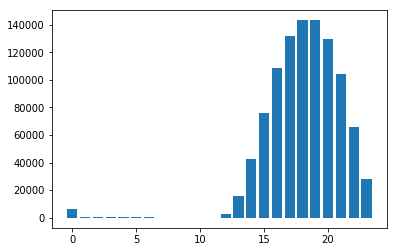

In [383]:
plt.bar(np.arange(24),pv_signals.groupby(pv_signals.index.hour).sum()['gen'])
plt.show()
